In [ ]:
import pandas as pd
import os

path = './datasets/'

if os.path.exists(path):
    # List all files in the folder and filter for CSV files
    csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]
    
    # Load each CSV file into a dictionary of dataframes
    #dataframes = {file: pd.read_csv(os.path.join(path, file)) for file in csv_files}
    dataSet1 = pd.read_csv(path+'/data_set_1.csv')
    dataSet2 = pd.read_csv(path+'/data_set_2.csv')
    
    # print first 5 lines
    print("dataSet1")
    print(dataSet1.head())
    print("dataSet2")
    print(dataSet2.head())
    
else:
    print("The datasets folder does not exist. Please check the path.")

dataSet1
   1   0.7197905348441712   0.3172602515682258
0  2             0.718572             0.308538
1  3             0.717821             0.303025
2  4             0.725701             0.363205
3  5             0.724039             0.350726
4  6             0.722917             0.342374
dataSet2
   1   0.9753859915098606   0.7366084655044645
0  2             0.975795             0.737679
1  3             0.976239             0.739043
2  4             0.976501             0.739310
3  5             0.976856             0.739929
4  6             0.976859             0.740123


In [15]:
sampleSet1 = dataSet1.sample(2500)

In [ ]:
import scipy
import numpy as np

df_dropped = dataSet1.drop(dataSet1.columns[0], axis=1)
df_dT = df_dropped.T
sample1PDF = scipy.stats.gaussian_kde(df_dropped_transposed)

In [27]:
sampleT = sampleSet1.T
sampleT.head()
#x_grid, y_grid = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]


,388691,29973,379098,5272,98568,294711,192520,124067,51869,81111,...,480431,221075,1895,205478,433052,33858,149111,150442,308510,110489
1,388693.000000,29975.000000,379100.000000,5274.000000,98570.000000,294713.000000,192522.000000,124069.000000,51871.000000,81113.000000,...,480433.000000,221077.000000,1897.000000,205480.000000,433054.000000,33860.000000,149113.000000,150444.000000,308512.000000,110491.000000
0.7197905348441712,0.928012,1.028248,0.939012,0.955800,1.077567,0.840682,0.858326,0.910465,0.923095,1.011281,...,1.087927,0.813142,1.075229,0.855793,1.050622,0.966856,0.953390,0.953417,0.825282,0.899027
0.3172602515682258,0.521071,0.641003,0.551222,0.531946,0.715822,0.392929,0.407023,0.465507,0.454615,0.621072,...,0.835293,0.364417,0.780174,0.412093,0.734489,0.517432,0.532522,0.533050,0.384054,0.448655


In [43]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=50, covariance_type='full', random_state=0)
gmm.fit(dataSet1)


GaussianMixture(n_components=50, random_state=0)

In [44]:
dataSet1['Cluster'] = gmm.predict(dataSet1)

In [52]:
gmm2 = GaussianMixture(n_components=100, covariance_type='full', random_state=0)
gmm2.fit(dataSet1)

GaussianMixture(n_components=100, random_state=0)

In [77]:
total_sample_size = 2500
num_clusters = dataSet1['Cluster'].nunique()
sample_size_per_cluster = total_sample_size // num_clusters

# Sample equally from each cluster
sampled_df = dataSet1.groupby('Cluster').apply(lambda x: x.sample(sample_size_per_cluster)).reset_index(drop=True)


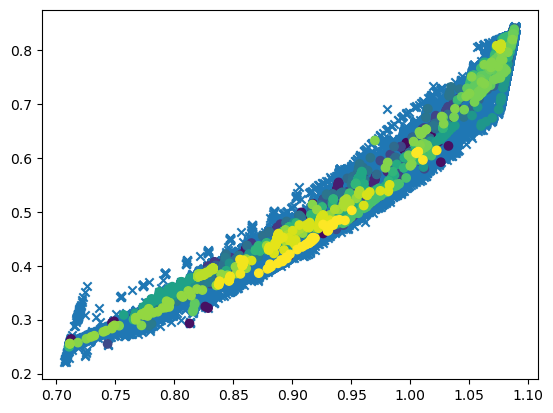

In [94]:
import matplotlib.pyplot as plt
plt.scatter(dataSet1.iloc[:,1],dataSet1.iloc[:,2],marker='x')
plt.scatter(sampled_df.iloc[:, 1], sampled_df.iloc[:, 2], c=sampled_df['Cluster'], marker='o')
#plt.scatter(sampled_df.iloc[:, 1], sampled_df.iloc[:, 2], c=sampled_df['Cluster'], marker='o')
plt.show()

In [92]:
total_sample_size = 2500

# Calculate the proportion of each cluster
cluster_sizes = dataSet1['Cluster'].value_counts()
total_size = len(dataSet1)

# Calculate how many samples to take from each cluster based on its proportion
proportional_sample_sizes = np.ceil((cluster_sizes / total_size * total_sample_size)).astype(int)

# Sample proportionately from each cluster
sampled_df2 = dataSet1.groupby('Cluster').apply(
    lambda x: x.sample(n=proportional_sample_sizes[x.name], random_state=42)
).reset_index(drop=True)
sampled_df2 = sampled_df2.sample(n=total_sample_size)


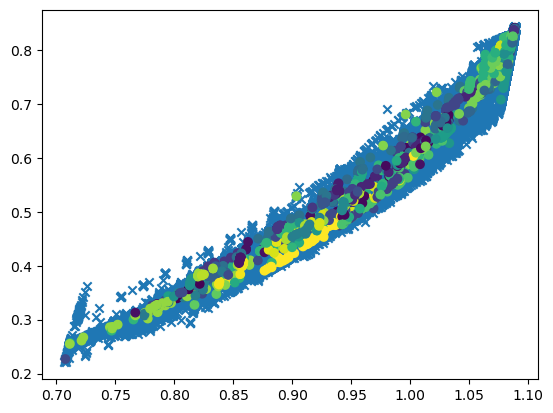

In [93]:
import matplotlib.pyplot as plt
plt.scatter(dataSet1.iloc[:,1],dataSet1.iloc[:,2],marker='x')
plt.scatter(sampled_df2.iloc[:, 1], sampled_df2.iloc[:, 2], c=sampled_df2['Cluster'], marker='o')
plt.show()

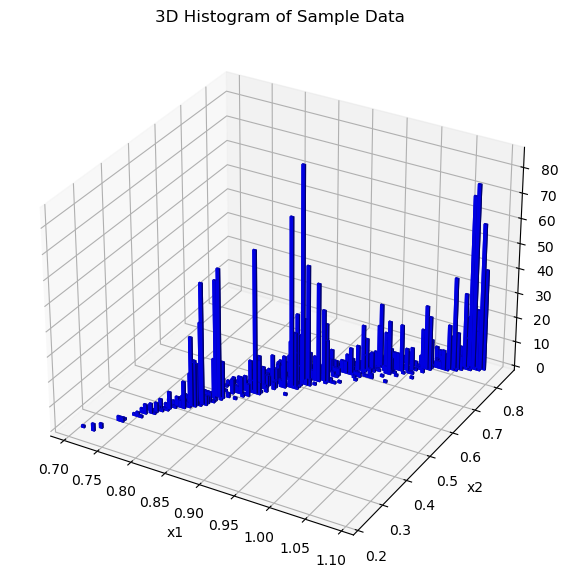

In [119]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

bins = 75
# Plot the 3D histogram
hist, xedges, yedges = np.histogram2d(sampled_df2.iloc[:, 1], sampled_df2.iloc[:, 2], bins=bins)

# Construct a meshgrid for the x and y coordinates
xpos, ypos = np.meshgrid(xedges[:-1] , yedges[:-1])
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

# The dimensions of the bars
dx = dy = 0.005 * np.ones_like(zpos)
dz = hist.flatten()

nonzero_indices = dz > 0
xpos = xpos[nonzero_indices]
ypos = ypos[nonzero_indices]
zpos = zpos[nonzero_indices]
dx = dx[nonzero_indices]
dy = dy[nonzero_indices]
dz = dz[nonzero_indices]

# Plot the bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

# Labels and title
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Count')
ax.set_title('3D Histogram of Sample Data')

# Show the plot
plt.show()
